In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [8]:
df = pd.read_csv('./datasets/fcc-forum-pageviews.csv',index_col=['date'])
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


In [10]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [11]:
df.columns

Index(['value'], dtype='object')

In [12]:
# Cleaning the data
df_clean = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3+ KB


In [14]:
df_clean.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


In [15]:
df_clean.index.max()

'2019-12-03'

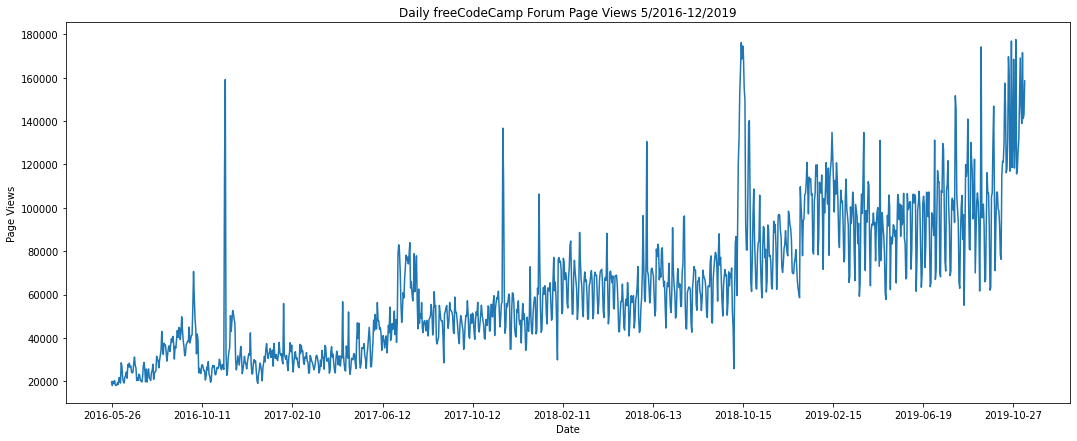

In [24]:
# Line plot of average page views over time
plt.figure(figsize=(18,7))
fig1 = plt.plot(df_clean)
plt.xticks(np.arange(np.argmin(df_clean), np.argmax(df_clean), 122))
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
fig1

In [17]:
# Arranging month dataframe to create ordered lists of month names (full and abbreviated)
month_name = pd.Series((pd.DatetimeIndex(df_clean.index).month_name()).unique())
month_name_abbr = pd.Series((pd.DatetimeIndex(df_clean.index).month_name()).unique()).str[:3]
month_int = pd.Series(((pd.DatetimeIndex(df_clean.index).month).unique()))


month_df = pd.concat([month_int, month_name, month_name_abbr], axis=1)
month_df.set_axis(["month_int", "month_name", "month_name_abbr"], axis=1, inplace=True)
month_df = month_df.sort_values('month_int')
month_df

,month_int,month_name,month_name_abbr
8,1,January,Jan
9,2,February,Feb
10,3,March,Mar
11,4,April,Apr
0,5,May,May
1,6,June,Jun
2,7,July,Jul
3,8,August,Aug
4,9,September,Sep
5,10,October,Oct


(array([0, 1, 2, 3]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019')])

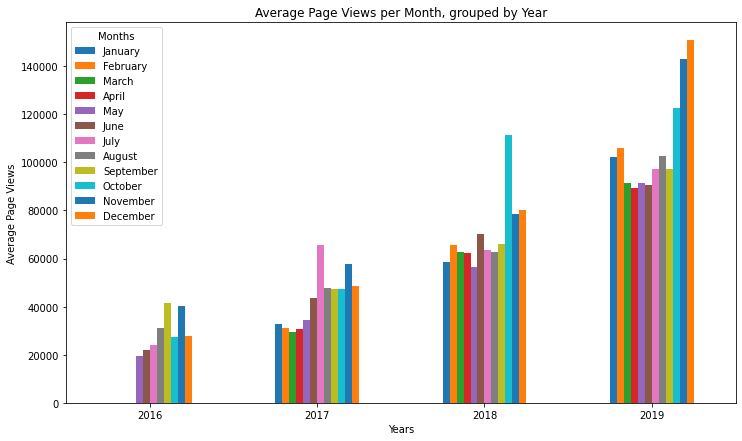

In [18]:
# Create new dataframe filtered by month and year and add the newly created columns
df_bar = df_clean.copy()
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()
months = pd.Series(month_df.month_name).tolist()

# Plot a bar chart of average daily page views for each month grouped by year
fig2 = df_bar.plot.bar(figsize=(12,7), legend=True, stacked=False)
plt.legend(title="Months", labels = months)
plt.title("Average Page Views per Month, grouped by Year")
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.xticks(rotation=0)

Text(0, 0.5, 'Page Views')

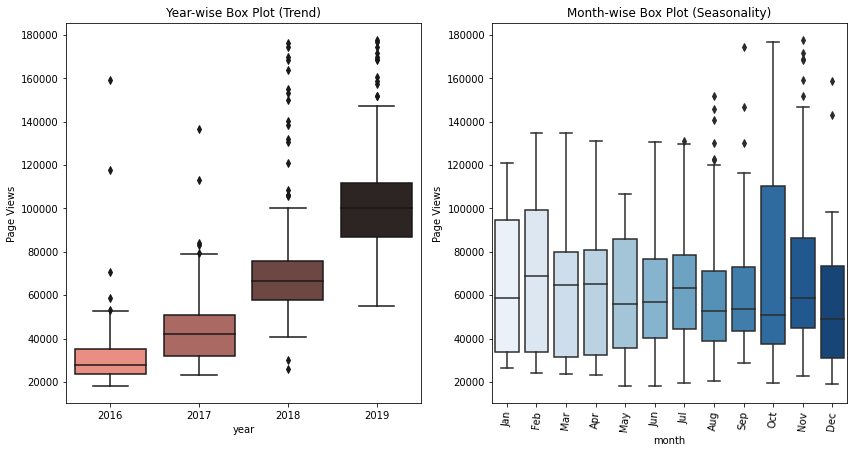

In [19]:
# Prepare the data for the box plot
df_box = df_clean.copy()
df_box['year'] = pd.DatetimeIndex(df_box.index).year
df_box['month'] = pd.DatetimeIndex(df_box.index).month_name().str[:3]

order = pd.Series(month_df.month_name_abbr).tolist()


# Box plots of the year-wise (trend) and month-wise(seasonality) relationships with avergae page views
fig, ax = plt.subplots(1, 2, figsize=(14,7))

box_year = sns.boxplot(data=df_box, x='year', y='value', ax=ax[0], palette="dark:salmon_r")
box_year.set(title="Year-wise Box Plot (Trend)")
box_year.set_ylabel("Page Views")

box_month = sns.boxplot(data=df_box, x='month', y='value', ax=ax[1], palette="Blues", order=order)
box_month.set(title="Month-wise Box Plot (Seasonality)")
box_month.set_xticklabels(box_month.get_xticklabels(),rotation = 85)
box_month.set_ylabel("Page Views")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba44cc84-e4b8-4d6a-acff-8eb6d007126a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>